In [10]:
# import library
import pandas as pd
import glob
from importlib import reload
import natsort 
reload(natsort)
from natsort import natsorted
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss

In [14]:
# read 5day step csv file 
csv_path = glob.glob(r"C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\*.csv")
#csv_path = glob.glob(r"/Users/moritakayuki/Desktop/2022/*.csv")
sorted_files = natsorted(csv_path)
for temp in sorted_files:
    print(temp)
    
#欠損日を含む2023年のSentinel-2データ取得日
year =['2023/']
day_2022= ['1/4' ,'1/9','1/14','1/19','1/24','1/29','2/3','2/8','2/13','2/18','2/23','2/28','3/5',
           '3/10','3/15','3/20','3/25','3/30','4/4','4/9','4/14','4/19','4/24','4/29','5/4',
           '5/9','5/14','5/19','5/24','5/29','6/3','6/8','6/13','6/18','6/23','6/28','7/3',
           '7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17','8/22','8/27','9/1',
           '9/6','9/11','9/16','9/21','9/26']
ymd_date_2023 = [year[0] + d for d in day_2022]

#2023年のSentinel-2データ取得日
year =['2023/']
day= ['1/4','1/9','1/14','1/19','1/24','2/18','3/5','3/10','3/20','3/25','4/4','4/9',
      '4/19','4/24','4/29','5/4','5/9','5/14','5/19','5/24','5/29','6/3','6/8',
      '6/18','6/23','6/28','7/8','7/13','7/18','7/23','7/28','8/7','8/12','8/17',
      '8/22','8/27','9/1','9/6','9/11','9/16','9/21','9/26'] 
ymd_date = [year[0] + d for d in day]

# 対象期間の絞り込み（テストサイトの移植日は早くても-）
year =['2023/']
DOI= ['4/9','4/14',
      '4/19','4/24','4/29','5/4','5/9','5/14','5/19','5/24','5/29','6/3','6/8','6/13',
      '6/18','6/23','6/28','7/3','7/8','7/13','7/18','7/23','7/28','8/2','8/7','8/12','8/17',
      '8/22','8/27','9/1','9/6','9/11','9/16','9/21','9/26'] #+3
doi_date_2023 = [year[0] + d for d in DOI]

# read index 
output_list = []
output_colums = list(range(1, 138025))
for input_file in sorted_files:
    input_df = pd.read_csv(input_file, encoding="utf-8-sig", skiprows=1, nrows=138024, usecols=[21], header=None)
    input_list = input_df.to_numpy().tolist()
    output_row = list(itertools.chain.from_iterable(input_list))
    output_list.append(output_row)

# NDVI timeseries dataframe
output_df = pd.DataFrame(output_list, columns=output_colums, index=ymd_date, dtype=np.float64)
output_df_trans = output_df.T
#output_df_trans.head()

# Reindex to include NaN for missing dates in 2023
output_df_2023 = output_df.reindex(index=ymd_date_2023)
output_df_2023.replace("           nan", np.nan, inplace=True)
output_df_2023_t = output_df_2023.T

# save
output_df_2023.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_timeseries_all.csv")
output_df_2023_t.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_timeseries_all_t.csv")

# 対象期間の絞り込み
doy_2023 = output_df_2023_t[doi_date_2023]
doy_2023_t = doy_2023.T

# save
doy_2023_t.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_timeseries_doi.csv")
doy_2023.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_timeseries_doi_t.csv")

# Savitzy Golay filter
a_int = doy_2023_t.interpolate()
a_int.replace(np.nan, "NaN")
b = a_int.dropna(axis=1)
df_sg = pd.DataFrame(index=b.index)
window_length = 13  
polyorder = 4
filtered = {}
columns = list(b.columns)
for i in range(131678):  
    df_sg[columns[i]] = ss.savgol_filter(b[columns[i]], window_length=window_length, polyorder=polyorder)

df_sg.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_timeseries_sg_t.csv") 

C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230104_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230109_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230114_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230119_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230124_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230218_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230305_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230310_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230320_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230325_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230404_parcel.csv
C:\Users\HONGO-23\Desktop\data\01_Sentinel-2\Cihea\parcel\2023\20230409_parcel.csv
C:\U

C:\Users\HONGO-23\AppData\Local\Temp\ipykernel_21080\385256335.py:74: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sg[columns[i]] = ss.savgol_filter(b[columns[i]], window_length=window_length, polyorder=polyorder)


In [12]:
path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_timeseries_sg_t.csv"
df_sg= pd.read_csv(path, index_col=0)
df_sg

,1,2,3,4,5,7,8,9,10,11,...,132103,132104,132105,132107,132108,132109,132110,132111,132112,132113
2023/3/20,0.602546,0.613223,0.581347,0.611181,0.598126,0.605319,0.547113,0.519437,0.617645,0.617857,...,0.406414,0.436020,0.405575,0.451856,0.452148,0.441016,0.454768,0.449600,0.425745,0.464225
2023/3/25,0.481787,0.510774,0.467714,0.483960,0.467865,0.474879,0.447324,0.455921,0.485303,0.505865,...,0.507740,0.541234,0.517572,0.557451,0.552765,0.544657,0.568396,0.580502,0.548733,0.551911
2023/3/30,0.389068,0.430838,0.391487,0.388404,0.369416,0.379576,0.385129,0.415967,0.386822,0.422625,...,0.610765,0.642884,0.624592,0.660505,0.649362,0.644512,0.672115,0.696264,0.658913,0.637464
2023/4/4,0.329097,0.380085,0.350711,0.328723,0.305634,0.319932,0.351918,0.391677,0.323412,0.372412,...,0.706216,0.733690,0.719735,0.752398,0.734715,0.733729,0.760903,0.790563,0.750149,0.714686
2023/4/9,0.302727,0.360737,0.341163,0.305143,0.276068,0.293698,0.339477,0.376289,0.293456,0.355523,...,0.786558,0.807760,0.797421,0.826313,0.803170,0.806862,0.830885,0.858893,0.817974,0.778633
2023/4/14,0.306958,0.370572,0.356358,0.313902,0.276965,0.295855,0.339986,0.364174,0.292511,0.368267,...,0.845989,0.860583,0.853394,0.877241,0.850637,0.859869,0.879330,0.898560,0.859587,0.825611
2023/4/19,0.334938,0.402921,0.387541,0.347259,0.301267,0.318614,0.346018,0.350835,0.313305,0.402976,...,0.880443,0.889034,0.884718,0.901976,0.874594,0.890115,0.904655,0.908688,0.873853,0.853174
2023/4/24,0.401836,0.473993,0.449608,0.420912,0.362612,0.375740,0.366484,0.343195,0.368815,0.475095,...,0.892175,0.893666,0.892507,0.899917,0.873819,0.896302,0.903206,0.885425,0.858256,0.863530
2023/4/29,0.440209,0.511497,0.475538,0.463005,0.398713,0.404669,0.364088,0.319670,0.399897,0.513233,...,0.867111,0.866175,0.867230,0.866992,0.846977,0.876684,0.881539,0.839186,0.818282,0.845685
2023/5/4,0.427934,0.492532,0.446892,0.450595,0.387705,0.384507,0.330862,0.278926,0.386707,0.494779,...,0.809108,0.813048,0.813156,0.811320,0.800879,0.835795,0.847511,0.783575,0.763837,0.799307


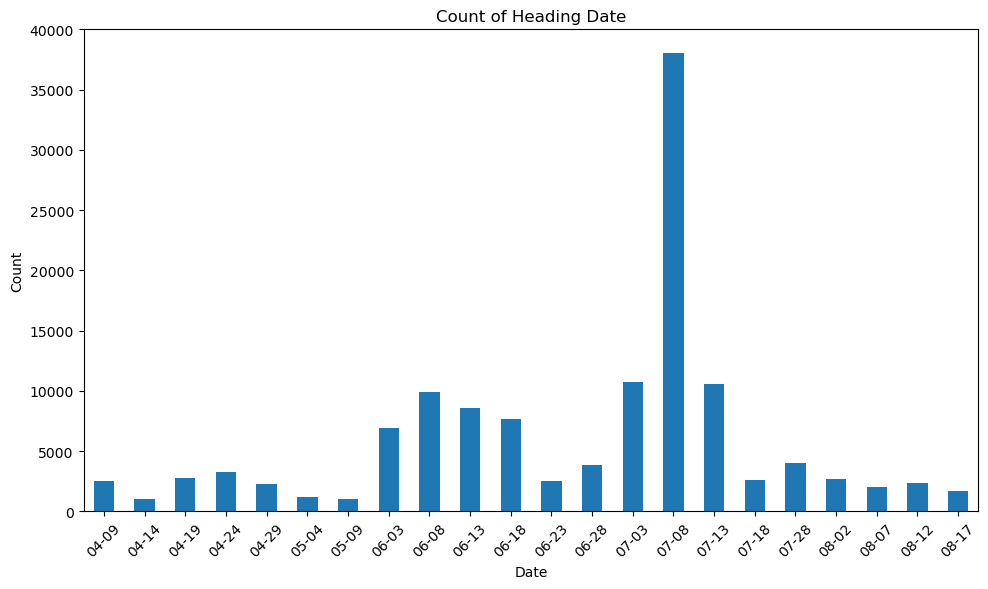

In [17]:
# NDVI maxdate
columns = list(df_sg.columns)
max_index = df_sg.idxmax()
df = pd.DataFrame(max_index,columns=['Max_Date'])
df.index.name = 'OBJECTID'
#df.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/NDVI.csv")
df.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_heading_date.csv")

#count ndvi max date
# 日付型に変換
df['Max_Date'] = pd.to_datetime(df['Max_Date'])

# 2022/3/20から2022/10/11までの日付を範囲としてカウント
date_range = pd.date_range(start='2023/4/9', end='2023/9/26', freq='D')
counts = df['Max_Date'].value_counts().reindex(date_range, fill_value=0)

# カウントがある日付のみを取得
valid_dates = counts[counts > 1000]

# 月日の形式に変換
valid_dates.index = valid_dates.index.strftime('%m-%d')

# 棒グラフをプロット
plt.figure(figsize=(10, 6))
valid_dates.plot(kind='bar')
plt.title('Count of Heading Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim(0,40000)

plt.show()

In [9]:
import csv
# 既存のCSVファイルを読み込む
input_file_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_heading_date.csv"
output_file_path = r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2023\2023_ndvi_max_date_updated.csv"

with open(input_file_path, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# ヘッダーリストを作成し、初期化
min_length = max(len(data[0]), len(doi_date_2023) + 2)
header = [""] * min_length

# 0列目と1列目にヘッダーを書き込む
header[0] = "OBJECTID"
header[1] = "max date"

# 2列飛ばしてヘッダーを書き込む
for i, value in enumerate(doi_date_2023):
    header[i + 2] = value

# ヘッダーをデータに反映
data[0] = header

# 修正したデータを新しいCSVファイルに書き込む
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

#日付けだけのファイルを読み込む
df_m = pd.read_csv(output_file_path)
df_m
df_m.to_csv(r"C:\Users\HONGO-23\Desktop\data\ndvi_max day\csv\2021\2021_timeseries_nodate.csv")

In [6]:
df

,Max_Date
OBJECTID,
1,2023-07-18
2,2023-07-18
3,2023-07-18
4,2023-07-18
5,2023-07-18
...,...
132109,2023-04-24
132110,2023-04-24
132111,2023-04-19


In [25]:
#出穂日からの経過日数算出準備
import csv

# DOI日付リスト
year = ['2023/']
DOI = ['3/20','3/25','4/4','4/9','4/19','4/24','4/29','5/4','5/9','5/14','5/19','5/24',
       '5/29','6/3','6/8','6/18','6/23','6/28','7/8','7/13','7/18','7/23','7/28','8/7',
       '8/12','8/17','8/22','8/27','9/1','9/6','9/11','9/16','9/21','9/26'] 
doi_date_2023 = [year[0] + d for d in DOI]

# 既存のCSVファイルを読み込む
input_file_path = r"C:\Users\HONGO-23\Desktop\test\ndvi_max_date_2023.csv"
output_file_path = r"C:\Users\HONGO-23\Desktop\test\ndvi_max_date_2023_updated.csv"

with open(input_file_path, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# ヘッダーリストを作成し、初期化
min_length = max(len(data[0]), len(doi_date_2023) + 2)
header = [""] * min_length

# 0列目と1列目にヘッダーを書き込む
header[0] = "OBJECTID"
header[1] = "max date"

# 2列飛ばしてヘッダーを書き込む
for i, value in enumerate(doi_date_2023):
    header[i + 2] = value

# ヘッダーをデータに反映
data[0] = header

# 修正したデータを新しいCSVファイルに書き込む
with open(output_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

In [26]:
path = r"C:\Users\HONGO-23\Desktop\test\ndvi_max_date_2023_updated.csv"
df = pd.read_csv(path)
df.head()

,OBJECTID,max date,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,1,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pandas as pd

# ファイルパス
#file_path = r"C:\Users\HONGO-23\Desktop\test\ndvi_max_date_2023_updated.csv"
file_path = r"/Users/moritakayuki/Desktop/test/test/ndvi_max_date_2023_updated.csv"
# CSVファイルを読み込み
df_m = pd.read_csv(file_path)
df_m

,OBJECTID,max date,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,1,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2023/7/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124895,132109,2023/4/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124896,132110,2023/4/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124897,132111,2023/4/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124898,132112,2023/4/24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
import pandas as pd
from datetime import datetime

# 日付差分を計算する関数を定義
def calculate_date_difference(date1_str, date2_str):
    date_format = "%Y/%m/%d"
    date1 = datetime.strptime(date1_str, date_format)
    date2 = datetime.strptime(date2_str, date_format)
    return (date2 - date1).days
    
# DOI日付リスト
year = ['2023/']
DOI = ['3/20','3/25','4/4','4/9','4/19','4/24','4/29','5/4','5/9','5/14','5/19','5/24',
       '5/29','6/3','6/8','6/18','6/23','6/28','7/8','7/13','7/18','7/23','7/28','8/7',
       '8/12','8/17','8/22','8/27','9/1','9/6','9/11','9/16','9/21','9/26'] 
doi_date_2023 = [year[0] + d for d in DOI]

for col in doi_date_2023:
    df_m[col] = df_m['max date'].apply(lambda x: calculate_date_difference(x, col))

# 結果を表示
df_m

,OBJECTID,max date,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,1,2023/7/18,-120,-115,-105,-100,-90,-85,-80,-75,...,25,30,35,40,45,50,55,60,65,70
1,2,2023/7/18,-120,-115,-105,-100,-90,-85,-80,-75,...,25,30,35,40,45,50,55,60,65,70
2,3,2023/7/18,-120,-115,-105,-100,-90,-85,-80,-75,...,25,30,35,40,45,50,55,60,65,70
3,4,2023/7/18,-120,-115,-105,-100,-90,-85,-80,-75,...,25,30,35,40,45,50,55,60,65,70
4,5,2023/7/18,-120,-115,-105,-100,-90,-85,-80,-75,...,25,30,35,40,45,50,55,60,65,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124895,132109,2023/4/24,-35,-30,-20,-15,-5,0,5,10,...,110,115,120,125,130,135,140,145,150,155
124896,132110,2023/4/24,-35,-30,-20,-15,-5,0,5,10,...,110,115,120,125,130,135,140,145,150,155
124897,132111,2023/4/19,-30,-25,-15,-10,0,5,10,15,...,115,120,125,130,135,140,145,150,155,160
124898,132112,2023/4/24,-35,-30,-20,-15,-5,0,5,10,...,110,115,120,125,130,135,140,145,150,155


In [13]:
# 出穂日からの経過日数だけのデータフレームに整序
df_dif = df_m[doi_date_2023]
df_dif.head()

,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,2023/5/9,2023/5/14,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,-120,-115,-105,-100,-90,-85,-80,-75,-70,-65,...,25,30,35,40,45,50,55,60,65,70
1,-120,-115,-105,-100,-90,-85,-80,-75,-70,-65,...,25,30,35,40,45,50,55,60,65,70
2,-120,-115,-105,-100,-90,-85,-80,-75,-70,-65,...,25,30,35,40,45,50,55,60,65,70
3,-120,-115,-105,-100,-90,-85,-80,-75,-70,-65,...,25,30,35,40,45,50,55,60,65,70
4,-120,-115,-105,-100,-90,-85,-80,-75,-70,-65,...,25,30,35,40,45,50,55,60,65,70


In [14]:
def growth_classify(n):
    n = int(n)
    if 56 <= n:
        return 9
    elif  41 <= n <=  55:
        return 8
    elif  21 <= n <=  40:
        return 7
    elif   1 <= n <=  20:
        return 6
    elif -19 <= n <=   0:
        return 5
    elif -54 <= n <= -20:
        return 4
    elif -74 <= n <= -55:
        return 3
    elif -84 <= n <= -75:
        return 2
    elif n <= -76:
        return 1

df_growth_stage = df_dif.map(growth_classify)
df_growth_stage.head()

,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,2023/5/9,2023/5/14,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,1,1,1,1,1,1,2,2,3,3,...,7,7,7,7,8,8,8,9,9,9
1,1,1,1,1,1,1,2,2,3,3,...,7,7,7,7,8,8,8,9,9,9
2,1,1,1,1,1,1,2,2,3,3,...,7,7,7,7,8,8,8,9,9,9
3,1,1,1,1,1,1,2,2,3,3,...,7,7,7,7,8,8,8,9,9,9
4,1,1,1,1,1,1,2,2,3,3,...,7,7,7,7,8,8,8,9,9,9


In [40]:
# 栽培必要水量算出の定義式
def water_req(n):
    if 56 <= n:
        return 0
    elif  41 <= n <=  55:
        return 0
    elif  21 <= n <=  40:
        return 0.9
    elif   1 <= n <=  20:
        return 1.0
    elif -19 <= n <=   0:
        return 0.9
    elif -54 <= n <= -20:
        return 0.75
    elif -74 <= n <= -55:
        return 0.4
    elif -84 <= n <= -75:
        return 1.5
    elif n <= -76:
        return 0

df_water_requirement = df_dif.map(water_req)
df_water_requirement["OBJECTID"] = df_m["OBJECTID"]
df_water_requirement

,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,2023/5/9,2023/5/14,...,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26,OBJECTID
0,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124895,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132109
124896,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132110
124897,0.75,0.75,0.90,0.9,0.9,1.0,1.0,1.0,1.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132111
124898,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132112


In [41]:
# 圃場情報
path_area = "/Users/moritakayuki/Desktop/jupyter_notebook/dataset/all_area_polygon/all_area_poly_20240218.csv"
area = pd.read_csv(path_area)
area

,OBJECTID,Shape_Leng,Shape_Area
0,1,96.581572,580.001531
1,2,67.820988,250.252891
2,3,68.606867,279.330865
3,4,64.788022,263.989992
4,5,65.034261,189.839360
...,...,...,...
138019,138020,94.707813,568.030998
138020,138021,84.758085,326.153063
138021,138022,47.128727,139.247896
138022,138023,48.319357,138.937577


In [59]:
df_water_obj = pd.merge(df_water_requirement, area)
#df_water_obj = df_water_obj[doi_date_2023]
df_water_obj

,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,2023/5/9,2023/5/14,...,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26,OBJECTID,Shape_Leng,Shape_Area
0,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,1,96.581572,580.001531
1,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,2,67.820988,250.252891
2,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,3,68.606867,279.330865
3,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,4,64.788022,263.989992
4,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,0.4,0.4,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,5,65.034261,189.839360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124895,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132109,194.452745,899.034529
124896,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132110,44.932126,115.960684
124897,0.75,0.75,0.90,0.9,0.9,1.0,1.0,1.0,1.0,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132111,192.105737,1491.793332
124898,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132112,161.289092,1356.495707


In [70]:
update_df_water = df_water_obj[["OBJECTID", "Shape_Area"] + doi_date_2023].copy()
#haを平方メートルに変換
update_df_water["Shape_Area"] = update_df_water["Shape_Area"]/10000
update_df_water

,OBJECTID,Shape_Area,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,1,0.058000,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,...,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.025025,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,...,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.027933,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,...,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.026399,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,...,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.018984,0.00,0.00,0.00,0.0,0.0,0.0,1.5,1.5,...,0.9,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124895,132109,0.089903,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124896,132110,0.011596,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124897,132111,0.149179,0.75,0.75,0.90,0.9,0.9,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124898,132112,0.135650,0.75,0.75,0.75,0.9,0.9,0.9,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#1列目の値を取得する
shape_area = update_df_water.iloc[:, 1]
# 2列目から49列目の各列に対して、1列目の値を乗算
for i in range(3, 36):
    update_df_water.iloc[:, i] *= update_df_water["Shape_Area"][i-3]
update_df_water.head()
#update_df_water.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_paddy_rice.csv")

,OBJECTID,Shape_Area,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,1,0.058000,0.0,0.0,0.0,0.0,0.0,0.0,0.030812,0.030481,...,0.021178,0.021408,0.05299,0.021335,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.025025,0.0,0.0,0.0,0.0,0.0,0.0,0.030812,0.030481,...,0.021178,0.021408,0.05299,0.021335,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.027933,0.0,0.0,0.0,0.0,0.0,0.0,0.030812,0.030481,...,0.021178,0.021408,0.05299,0.021335,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.026399,0.0,0.0,0.0,0.0,0.0,0.0,0.030812,0.030481,...,0.021178,0.021408,0.05299,0.021335,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.018984,0.0,0.0,0.0,0.0,0.0,0.0,0.030812,0.030481,...,0.021178,0.021408,0.05299,0.021335,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_wr_update = update_df_water[["OBJECTID"] + doi_date_2023]
df_wr_t = df_wr_update.T
# 最初の行を新しいヘッダーとして設定し、最初の行を削除
new_header = df_wr_t.iloc[0]  # 0行目を新しいヘッダーに設定
df_wr_t = df_wr_t[1:]  # 最初の行を削除

df_wr_t.columns = new_header  # 新しいヘッダーを設定
df_wr_t

OBJECTID,1.0,2.0,3.0,4.0,5.0,7.0,8.0,9.0,10.0,11.0,...,132103.0,132104.0,132105.0,132107.0,132108.0,132109.0,132110.0,132111.0,132112.0,132113.0
2023/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
2023/3/25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500
2023/4/4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018769,0.018769,0.018769,0.018769,0.018769,0.018769,0.018769,0.022523,0.018769,0.018769
2023/4/9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140
2023/4/19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759
2023/4/24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.018984,0.017086,0.017086
2023/4/29,0.030812,0.030812,0.030812,0.030812,0.030812,0.000000,0.000000,0.000000,0.000000,0.030812,...,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541
2023/5/4,0.030481,0.030481,0.030481,0.030481,0.030481,0.000000,0.000000,0.000000,0.030481,0.030481,...,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321
2023/5/9,0.004911,0.004911,0.004911,0.004911,0.004911,0.000000,0.000000,0.000000,0.018415,0.004911,...,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276
2023/5/14,0.007759,0.007759,0.007759,0.007759,0.007759,0.000000,0.000000,0.000000,0.007759,0.007759,...,0.019398,0.019398,0.019398,0.019398,0.019398,0.019398,0.019398,0.017458,0.019398,0.019398


In [81]:
import numpy as np
#上流域
up_path = "/Users/moritakayuki/Desktop/jupyter_notebook/dataset/objectid_up.csv"
df_up = pd.read_csv(up_path)
df_up['OBJECTID'] = df_up['UP'].fillna(0).astype(np.int64)
df_up

,UP,OBJECTID
0,3408,3408
1,3409,3409
2,3410,3410
3,3411,3411
4,3412,3412
...,...,...
53304,138020,138020
53305,138021,138021
53306,138022,138022
53307,138023,138023


In [86]:
df_req_up = pd.merge(df_up, update_df_water)
#対象期間の絞り
df_req_up_dry = df_req_up[doi_date_2023]
df_req_up_dry

,2023/3/20,2023/3/25,2023/4/4,2023/4/9,2023/4/19,2023/4/24,2023/4/29,2023/5/4,2023/5/9,2023/5/14,...,2023/8/12,2023/8/17,2023/8/22,2023/8/27,2023/9/1,2023/9/6,2023/9/11,2023/9/16,2023/9/21,2023/9/26
0,0.00,0.0000,0.000000,0.00000,0.039598,0.028476,0.008217,0.008128,0.004911,0.007759,...,0.021178,0.021408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0000,0.000000,0.00000,0.039598,0.028476,0.008217,0.008128,0.004911,0.007759,...,0.021178,0.021408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.0000,0.000000,0.00000,0.039598,0.028476,0.008217,0.008128,0.004911,0.007759,...,0.021178,0.021408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.0000,0.000000,0.00000,0.039598,0.028476,0.008217,0.008128,0.004911,0.007759,...,0.021178,0.021408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0000,0.000000,0.00000,0.039598,0.028476,0.008217,0.008128,0.004911,0.007759,...,0.021178,0.021408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47229,0.75,0.0435,0.018769,0.02514,0.023759,0.017086,0.020541,0.020321,0.012276,0.019398,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47230,0.75,0.0435,0.018769,0.02514,0.023759,0.017086,0.020541,0.020321,0.012276,0.019398,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47231,0.75,0.0435,0.022523,0.02514,0.023759,0.018984,0.020541,0.020321,0.012276,0.017458,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47232,0.75,0.0435,0.018769,0.02514,0.023759,0.017086,0.020541,0.020321,0.012276,0.019398,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
def append_sum_row_label(df):
    df.loc['Total'] = df.sum(numeric_only=True)
    return df

#可視化
df_up_final = append_sum_row_label(df_req_up_dry.copy())
df_up_final = df_up_final.T
df_up_final['Total'] = df_up_final['Total'].fillna(0).astype(np.int64)
df_up_final
#df_up_final.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_u.csv")

,0,1,2,3,4,5,6,7,8,9,...,47225,47226,47227,47228,47229,47230,47231,47232,47233,Total
2023/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,20769
2023/3/25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,0.043500,1063
2023/4/4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018769,0.018769,0.018769,0.018769,0.018769,0.018769,0.022523,0.018769,0.018769,523
2023/4/9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,0.025140,653
2023/4/19,0.039598,0.039598,0.039598,0.039598,0.039598,0.039598,0.039598,0.039598,0.039598,0.039598,...,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,0.023759,781
2023/4/24,0.028476,0.028476,0.028476,0.028476,0.028476,0.028476,0.028476,0.028476,0.028476,0.028476,...,0.017086,0.017086,0.017086,0.017086,0.017086,0.017086,0.018984,0.017086,0.017086,697
2023/4/29,0.008217,0.008217,0.008217,0.008217,0.008217,0.008217,0.008217,0.008217,0.008217,0.008217,...,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,0.020541,670
2023/5/4,0.008128,0.008128,0.008128,0.008128,0.008128,0.008128,0.008128,0.008128,0.008128,0.008128,...,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,0.020321,628
2023/5/9,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,0.004911,...,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,0.012276,400
2023/5/14,0.007759,0.007759,0.007759,0.007759,0.007759,0.007759,0.007759,0.007759,0.007759,0.007759,...,0.019398,0.019398,0.019398,0.019398,0.019398,0.019398,0.017458,0.019398,0.019398,601


In [94]:
up_df = df_up_final["Total"].copy()
up_df
up_df.to_csv(r"/Users/moritakayuki/Desktop/test/up.csv")

In [95]:
mid_path = "/Users/moritakayuki/Desktop/jupyter_notebook/dataset/objectid_mid.csv"
df_mid = pd.read_csv(mid_path)
df_mid['OBJECTID'] = df_mid['MIDDLE'].fillna(0).astype(np.int64)
df_req_mid = pd.merge(df_mid, update_df_water)
#df_req_mid

#対象期間の絞り
df_req_mid_dry = df_req_mid[doi_date_2023]
#df_req_mid_dry.head()

#可視化
df_mid_final = append_sum_row_label(df_req_mid_dry.copy())
df_mid_final = df_mid_final.T
df_mid_final['Total'] = df_mid_final['Total'].fillna(0).astype(np.int64)
df_mid_final.head()
#df_up_final.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_u.csv")
mid_df = df_mid_final["Total"].copy()
mid_df
mid_df.to_csv(r"/Users/moritakayuki/Desktop/test/mid.csv")
#mid_df.plot()

In [96]:
down_path = "/Users/moritakayuki/Desktop/jupyter_notebook/dataset/objectid_down.csv"
df_down = pd.read_csv(down_path)
df_down['OBJECTID'] = df_down['DOWN'].fillna(0).astype(np.int64)
df_req_down = pd.merge(df_down, update_df_water)
#df_req_down

#対象期間の絞り
df_req_down_dry = df_req_down[doi_date_2023]
#df_req_down_dry.head()

#可視化
df_down_final = append_sum_row_label(df_req_down_dry.copy())
df_down_final = df_down_final.T
df_down_final['Total'] = df_down_final['Total'].fillna(0).astype(np.int64)
df_down_final.head()
#df_down_final.to_csv("/Users/moritakayuki/Desktop/jupyter_notebook/water_requirement_d.csv")
down_df = df_down_final["Total"].copy()
down_df
down_df.to_csv(r"/Users/moritakayuki/Desktop/test/down.csv")
#down_df.plot()

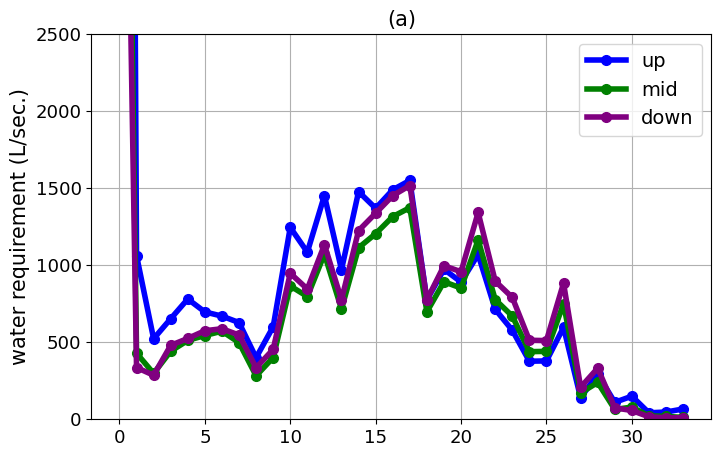

In [100]:
import matplotlib.pyplot as plt
#栽培必要水量
umd_path = r"/Users/moritakayuki/Desktop/test/water.csv"
umd = pd.read_csv(umd_path)
fig, ax = plt.subplots()
umd.plot(ax=ax, figsize=(8,5), color=["b","g","purple"], marker="o", markersize=7, linewidth=4)
ax.set_ylabel("water requirement (L/sec.)", fontsize=15)
ax.set_title("(a)", fontsize=15)
#day=["4/9","4/29","5/19","6/8","6/28","7/18","8/7","8/27"]
#xax=[0,4,8,12,16,20,24,28]
#ax.set_xticks(xax)
ax.set_ylim(0,2500)
#ax.set_xticklabels(day, rotation=45)
ax.tick_params(labelsize=13)
ax.grid()
ax.legend(fontsize=14)
#plt.savefig("/Users/moritakayuki/Desktop/jupyter_notebook/water_req.jpeg", dpi=800)